In [1]:
import pandas as pd
import ast
import glob
import os
import numpy as np

### graphic libraries
import matplotlib.pyplot as plt
import seaborn as sns
import dynamic_extrusion_boundaries.util_visual as utvis
import chromoscores.maputils as chrmap
import chromoscores.scorefunctions as chrsco
import chromoscores.snipping as chrsn
import cooler
from scipy.ndimage import gaussian_filter1d
from scipy import ndimage

### making dictionary of simulations

In [2]:
path_dict = {}

directory ='/home1/rahmanin/start/polychrom/projects/Dynamic_boundary_elements/analysis/maps/maps_points_cools_eq_l/'

for name  in glob.glob(directory+'folder_*'):
    path_dict[name.split('eq_l/')[1][:].split('.mcool')[0]]= name
path_dict = dict(sorted(path_dict.items()))


In [3]:
TIME_CONV_COEF = TIME_CONV_COEF= 21.875*60/500 #to convert from lattice based to seconds
LATTICE_CONV_COEF = 0.25 #each lattice site is 0.25 kb

In [4]:
def smooth(x, sigma = 1.5):
        return gaussian_filter1d(x, sigma)

### loading experimental data 

In [5]:
exp_scores = pd.read_csv('../output/scores/experiments/experimental_data_table.csv')

# experimental values
Bonev_val_wt = exp_scores.query('measurement=="Dot" and paper=="Bonev_2017" and condition=="WT"')['value']
Liu_val_wt = exp_scores.query('measurement=="Dot" and paper=="Liu_2020" and condition=="WT"')['value']
Liu_val_wapl = exp_scores.query('measurement=="Dot" and paper=="Liu_2020" and condition=="Wapl_6h"')['value']

### all orientation

30.0 seconds


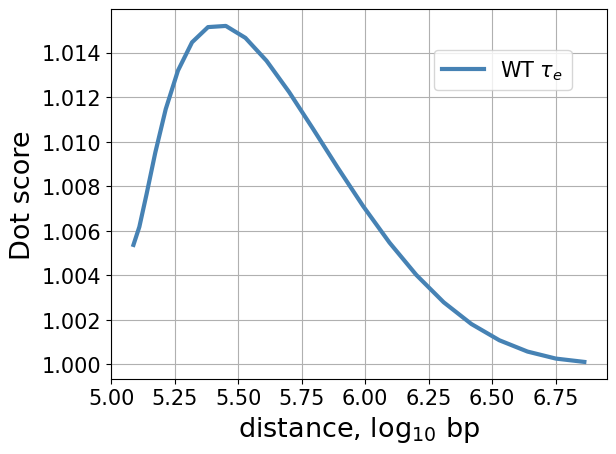

150.0 seconds
150.0 seconds


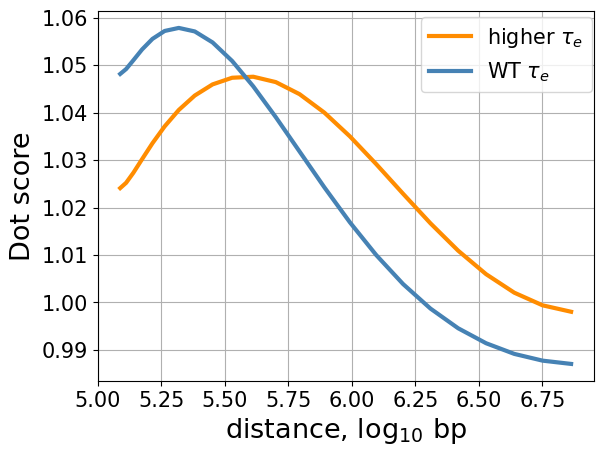

300.0 seconds
300.0 seconds
300.0 seconds


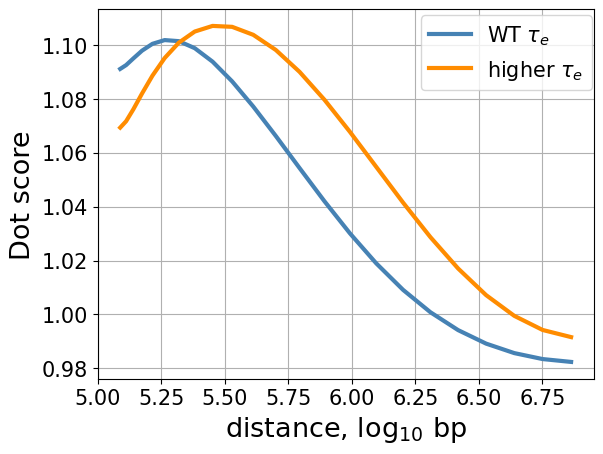

300.0 seconds
300.0 seconds
300.0 seconds


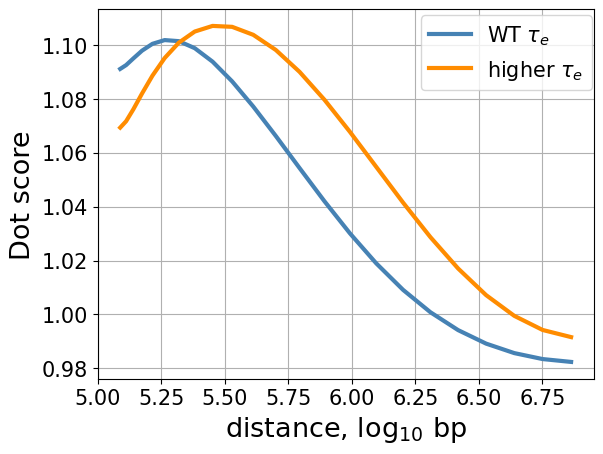

600.0 seconds
600.0 seconds


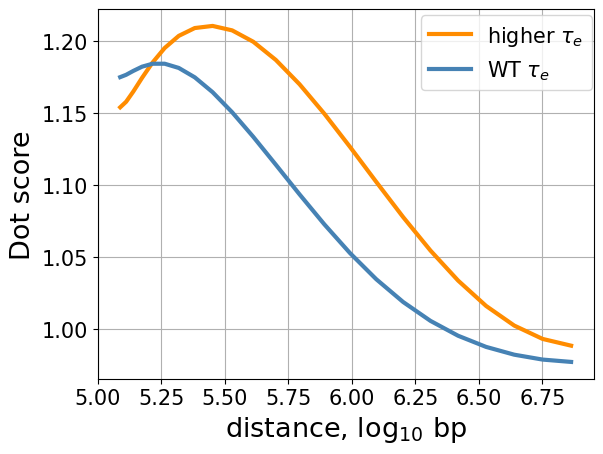

900.0 seconds
900.0 seconds
900.0 seconds


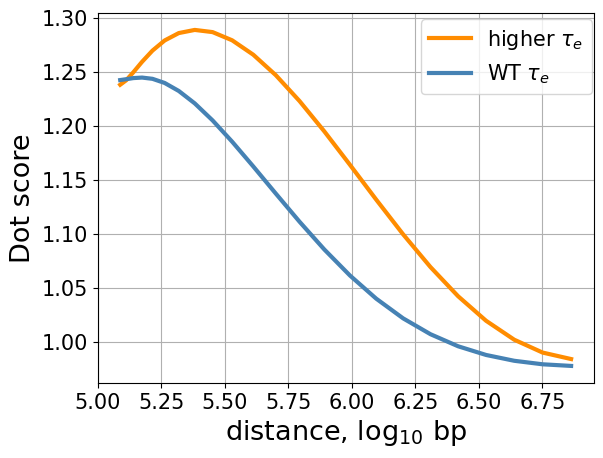

1500.0 seconds
1500.0 seconds
1500.0 seconds
1500.1 seconds


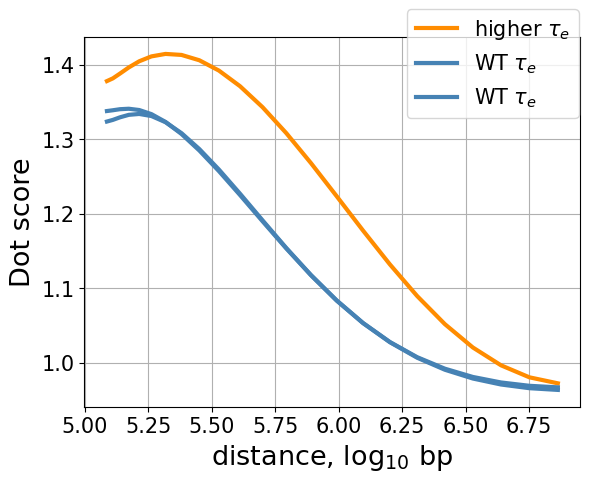

1500.0 seconds
1500.0 seconds
1500.0 seconds
1500.1 seconds


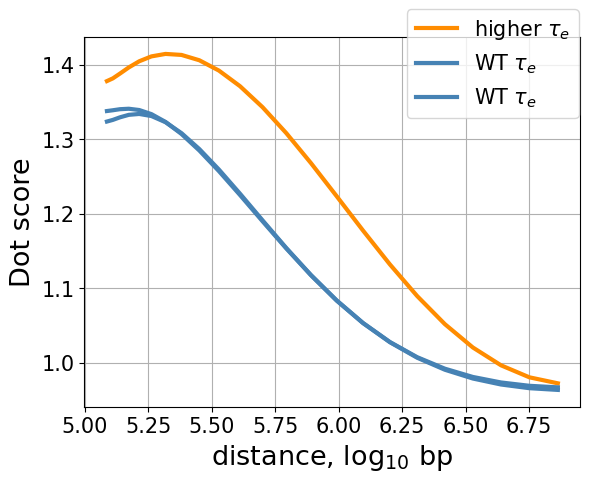

2235.0 seconds
2235.0 seconds


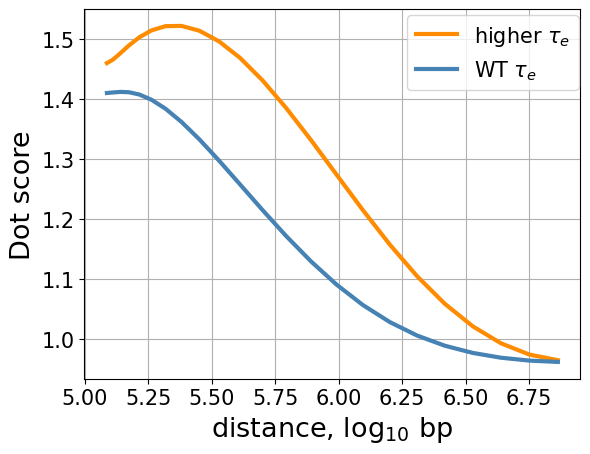

3000.0 seconds
3000.0 seconds
3000.0 seconds


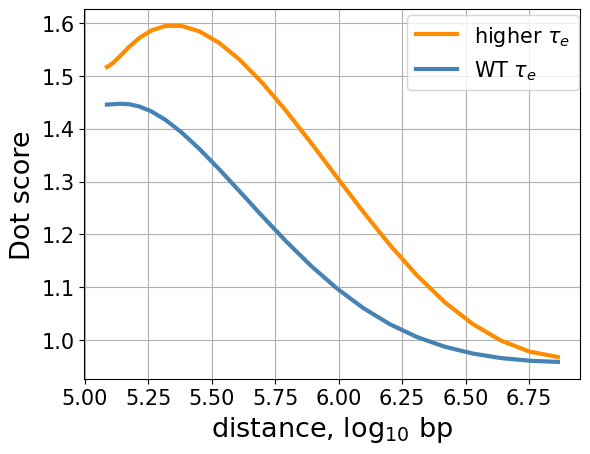

6000.0 seconds
6000.0 seconds
6000.0 seconds


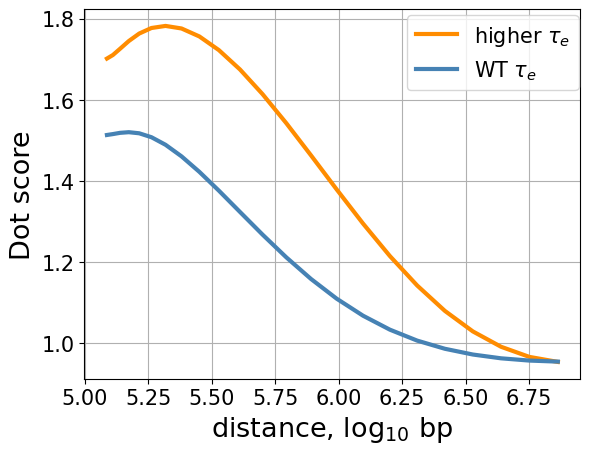

30000.0 seconds
30000.0 seconds
30000.0 seconds


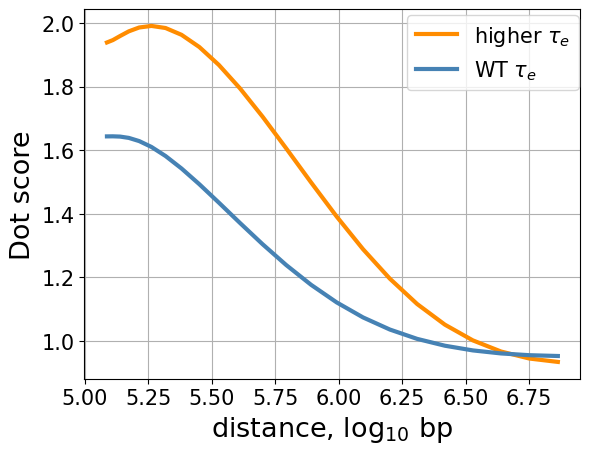

In [6]:
clife_range = [ 11.43, 57.14, 114.29, 114.3, 228.571, 342.86, 571.43, 571.45, 851.43, 1142.86,2285.71, 11428.57]

i = 1
sns.reset_defaults()

for clife_val in clife_range:
    i+=1
    for name in list(path_dict.keys()):
        params=[ast.literal_eval(i) for i in name.split('folder_')[1].split('_')[1::2]]
        face, back, clife, cof, life, slife, birth, pause, sep, site, mon, rep, step, vel = params
        if np.round(clife,1)==np.round(clife_val,1):
            print(np.round(clife*TIME_CONV_COEF,1),'seconds')
            
            if life == 1500 and vel ==1 and np.round((clife/(clife+cof)),2)==0.7:
                f=pd.read_csv('../output/scores/simulation/peakscore_with_orientation/peakscore_%s_hsteps_orientation_cool_res_10_points_eq_l.csv' % name)
                f = f[f['orientation']=='all']
                chr_dist = f['chr_distance']
                peak_score = f['peak_score']
                pixel_sta = 1

                color = 'darkorange'
                plt.plot(np.log10(chr_dist[pixel_sta:]*1000), smooth(peak_score[pixel_sta:], 3.95),color= color,linewidth = 3,label=r'higher $\tau_e$')
                
            if life == 500 and vel ==1 and np.round((clife/(clife+cof)),2)==0.7:
                f=pd.read_csv('../output/scores/simulation/peakscore_with_orientation/peakscore_%s_hsteps_orientation_cool_res_10_points_eq_l.csv' % name)
                f = f[f['orientation']=='all']
                chr_dist = f['chr_distance']
                peak_score = f['peak_score']
                pixel_sta = 1
                color='steelblue'
                plt.plot(np.log10(chr_dist[pixel_sta:]*1000), smooth(peak_score[pixel_sta:], 3.95),color=color,linewidth = 3,label=r'WT $\tau_e$')

    plt.grid(True)
    plt.ylabel('Dot score',fontsize = 19.5)
    plt.xlabel(r'distance, $\log_{10}\ \mathrm{bp}$', fontsize = 19.5)
    plt.legend(loc=(0.651,0.781), fontsize = 15)
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)
    plt.savefig('../output/figures/peak_and_distance_clife_%s_all.pdf'%clife_val,bbox_inches = 'tight',transparent=True)
    plt.show()

convergent +-

30.0 seconds


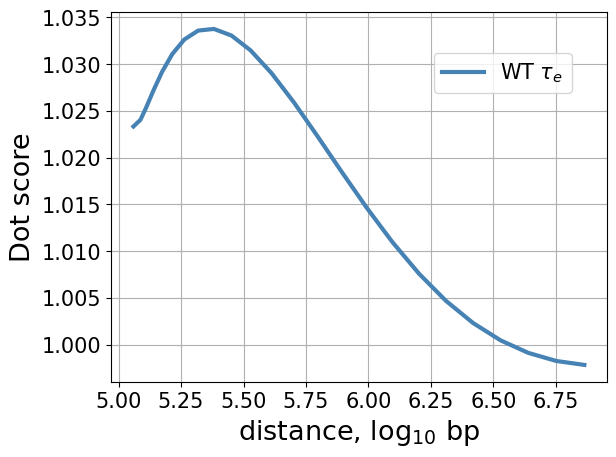

150.0 seconds
150.0 seconds


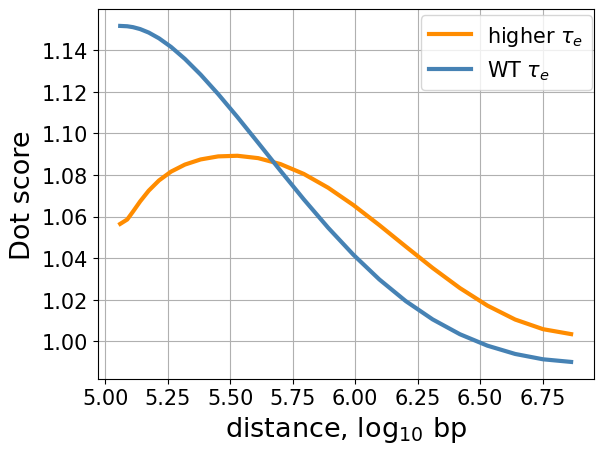

300.0 seconds
300.0 seconds
300.0 seconds


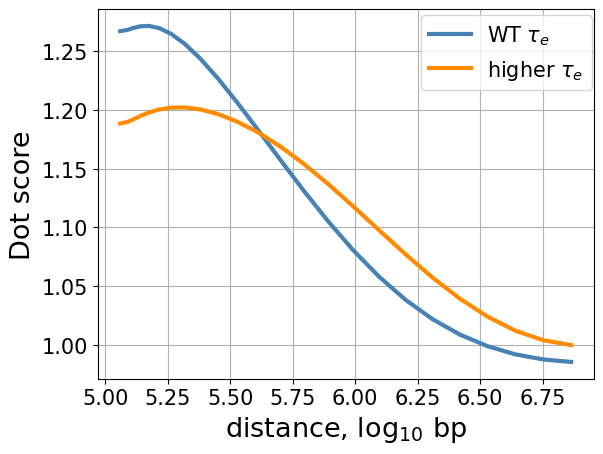

300.0 seconds
300.0 seconds
300.0 seconds


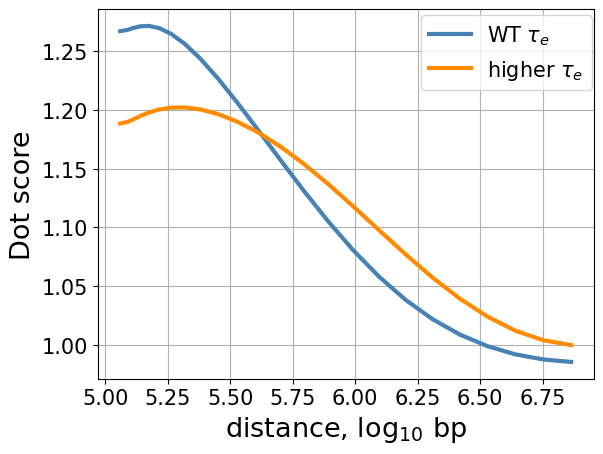

600.0 seconds
600.0 seconds


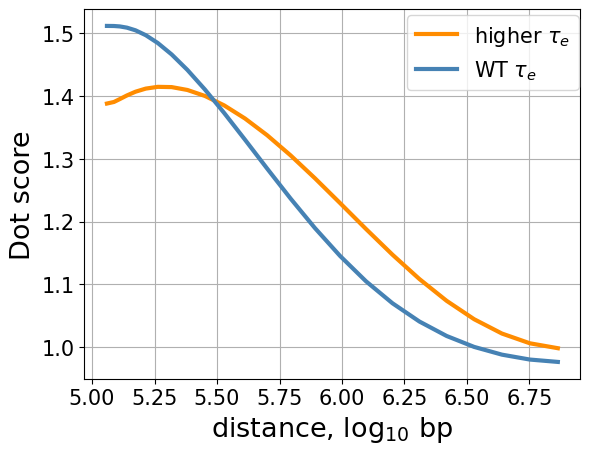

900.0 seconds
900.0 seconds
900.0 seconds


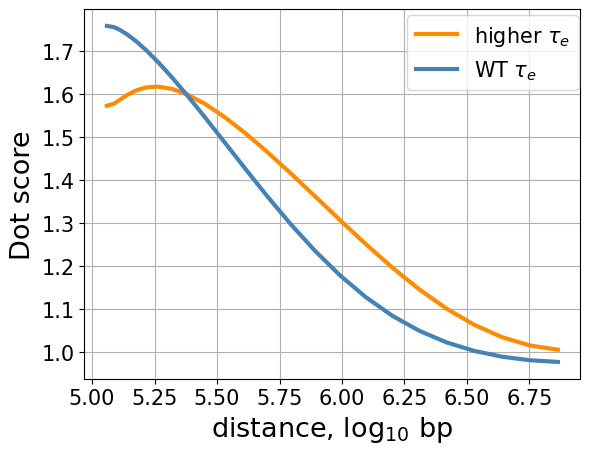

1500.0 seconds
1500.0 seconds
1500.0 seconds
1500.1 seconds


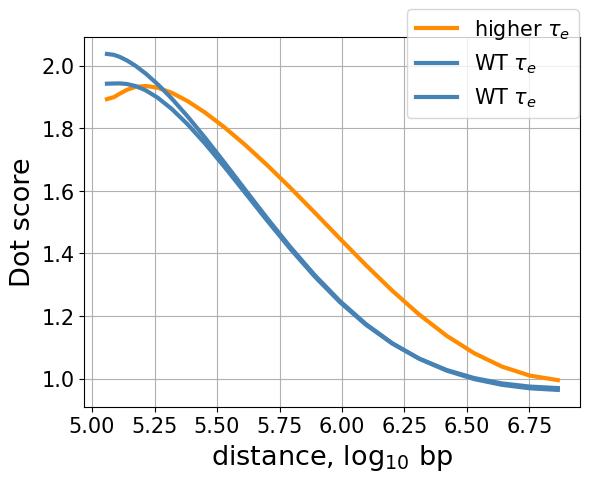

1500.0 seconds
1500.0 seconds
1500.0 seconds
1500.1 seconds


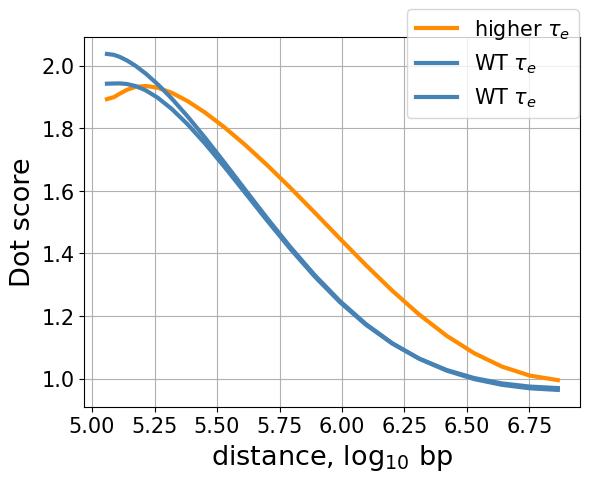

2235.0 seconds
2235.0 seconds


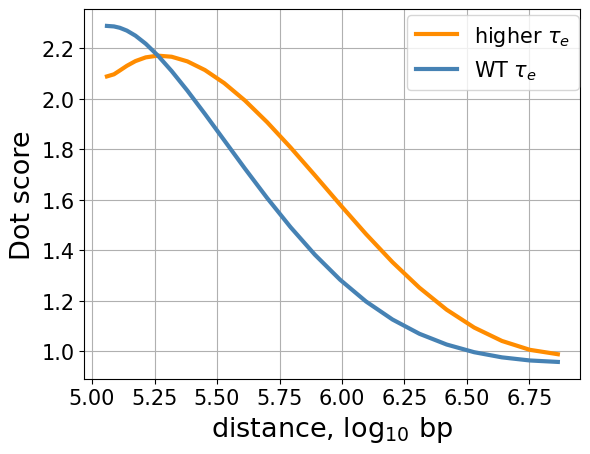

3000.0 seconds
3000.0 seconds
3000.0 seconds


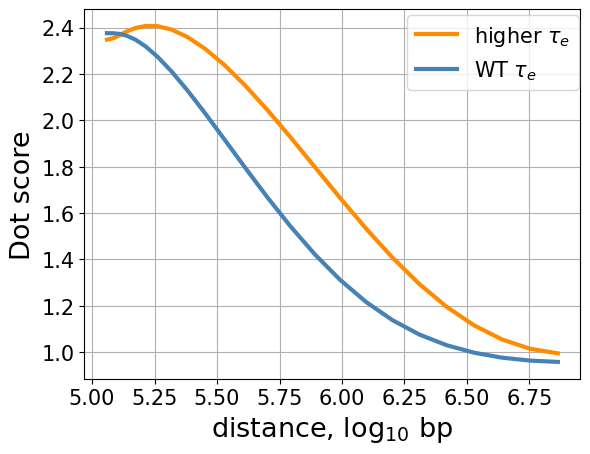

6000.0 seconds
6000.0 seconds
6000.0 seconds


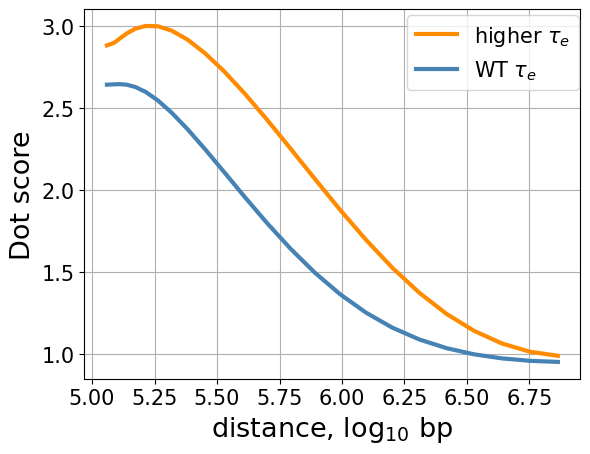

30000.0 seconds
30000.0 seconds
30000.0 seconds


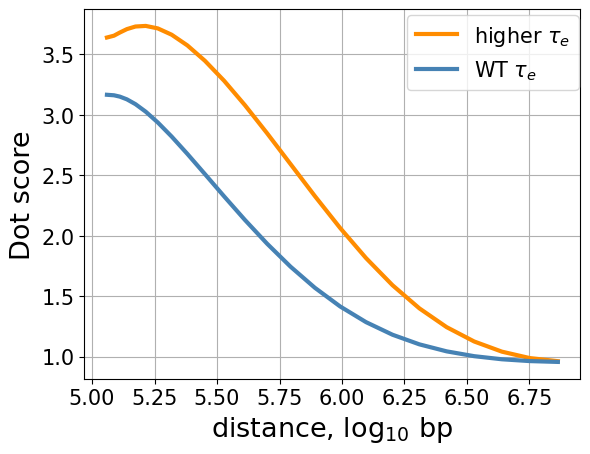

In [7]:
i = 1

for clife_val in clife_range:
    i+=1
    for name in list(path_dict.keys()):
        params=[ast.literal_eval(i) for i in name.split('folder_')[1].split('_')[1::2]]
        face, back, clife, cof, life, slife, birth, pause, sep, site, mon, rep, step, vel = params
        if np.round(clife,1)==np.round(clife_val,1):
            print(np.round(clife * TIME_CONV_COEF,1),'seconds')
            
            if life == 1500 and vel ==1 and np.round((clife/(clife+cof)),2)==0.7:
                f=pd.read_csv('../output/scores/simulation/peakscore_with_orientation/peakscore_%s_hsteps_orientation_cool_res_10_points_eq_l_pseudo_Psd1000.csv' % name)
                f = f[f['orientation']=='+-']
                chr_dist = f['chr_distance']
                peak_score = f['peak_score']
                pixel_sta = 1

                color = 'darkorange'
                plt.plot(np.log10(chr_dist[pixel_sta:]*1000), smooth(peak_score[pixel_sta:], 3.95),color= color,linewidth = 3,label=r'higher $\tau_e$')
                
            if life == 500 and vel ==1 and np.round((clife/(clife+cof)),2)==0.7:
                f=pd.read_csv('../output/scores/simulation/peakscore_with_orientation/peakscore_%s_hsteps_orientation_cool_res_10_points_eq_l_pseudo_Psd1000.csv' % name)
                f = f[f['orientation']=='+-']
                chr_dist = f['chr_distance']
                peak_score = f['peak_score']
                pixel_sta = 1
                color='steelblue'
                plt.plot(np.log10(chr_dist[pixel_sta:]*1000), smooth(peak_score[pixel_sta:], 3.95),color=color,linewidth = 3,label=r'WT $\tau_e$')

    plt.grid(True)
    plt.ylabel('Dot score',fontsize = 19.5)
    plt.xlabel(r'distance, $\log_{10}\ \mathrm{bp}$', fontsize = 19.5)
    plt.legend(loc=(0.651,0.781), fontsize = 15)
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)
    plt.savefig('../output/figures/peak_and_distance_clife_%s_conv.pdf'%clife_val,bbox_inches = 'tight',transparent=True)
    plt.show()

divergent 

30.0 seconds


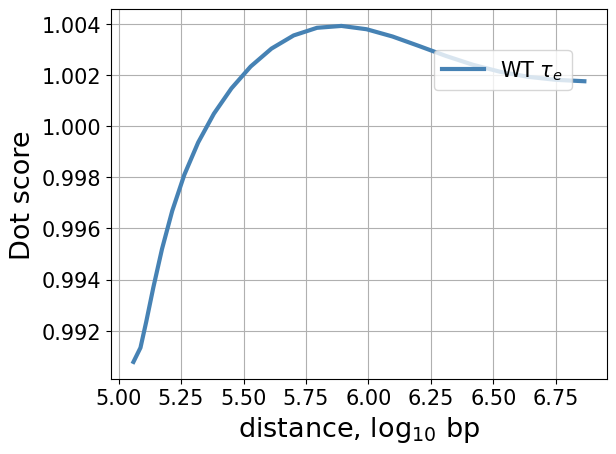

150.0 seconds
150.0 seconds


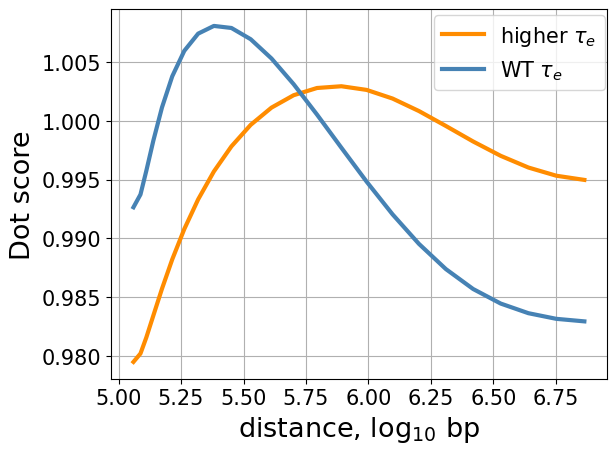

300.0 seconds
300.0 seconds
300.0 seconds


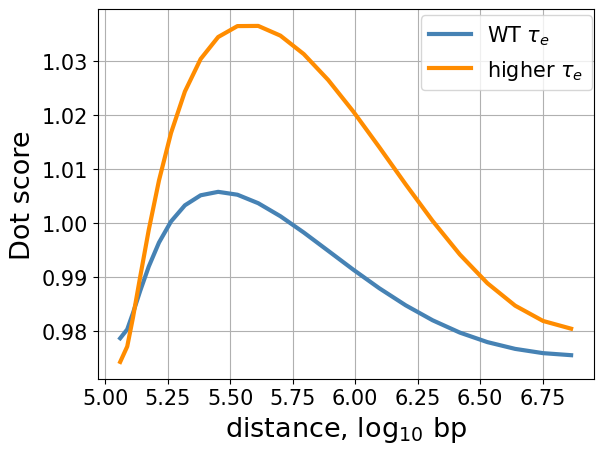

300.0 seconds
300.0 seconds
300.0 seconds


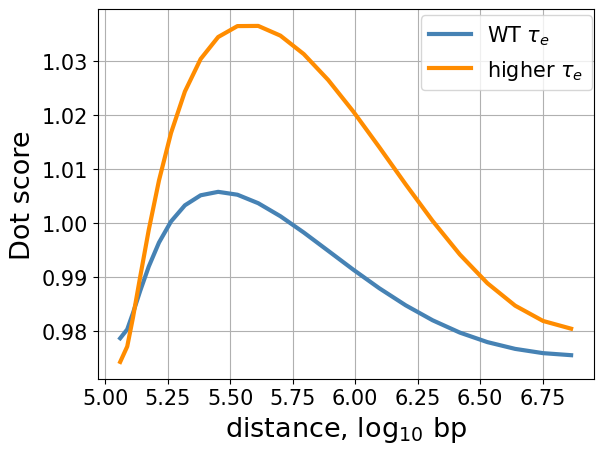

600.0 seconds
600.0 seconds


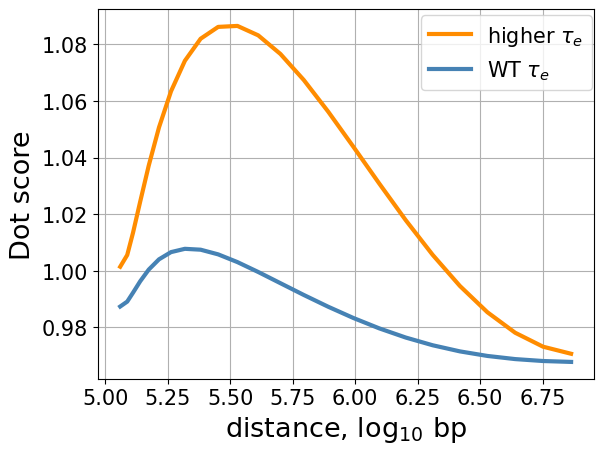

900.0 seconds
900.0 seconds
900.0 seconds


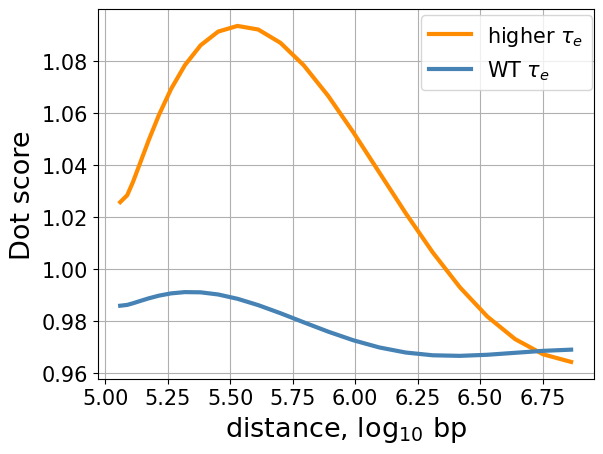

1500.0 seconds
1500.0 seconds
1500.0 seconds
1500.1 seconds


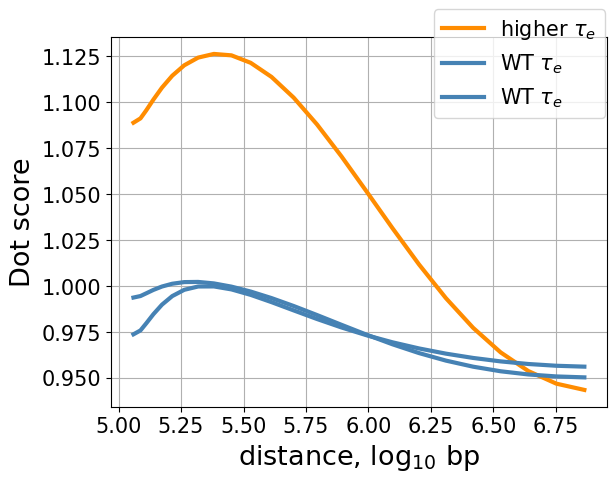

1500.0 seconds
1500.0 seconds
1500.0 seconds
1500.1 seconds


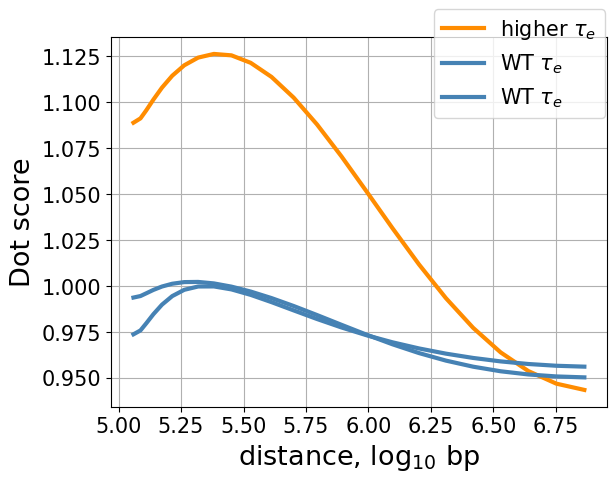

2235.0 seconds
2235.0 seconds


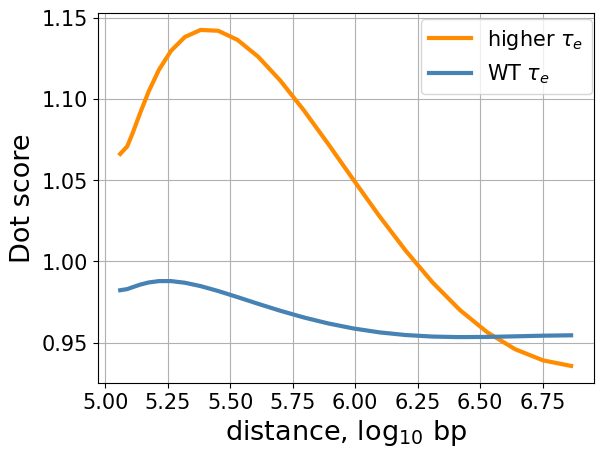

3000.0 seconds
3000.0 seconds
3000.0 seconds


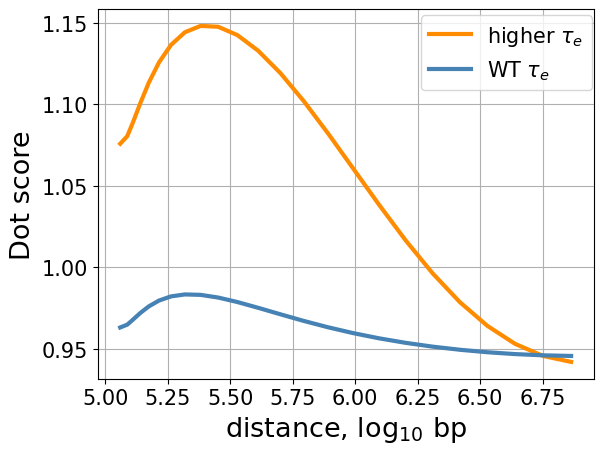

6000.0 seconds
6000.0 seconds
6000.0 seconds


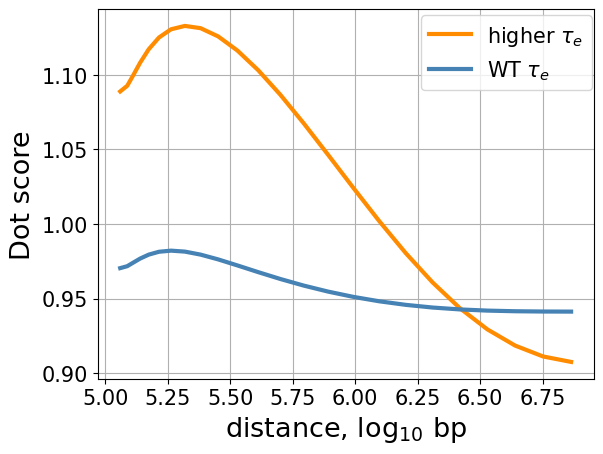

30000.0 seconds
30000.0 seconds
30000.0 seconds


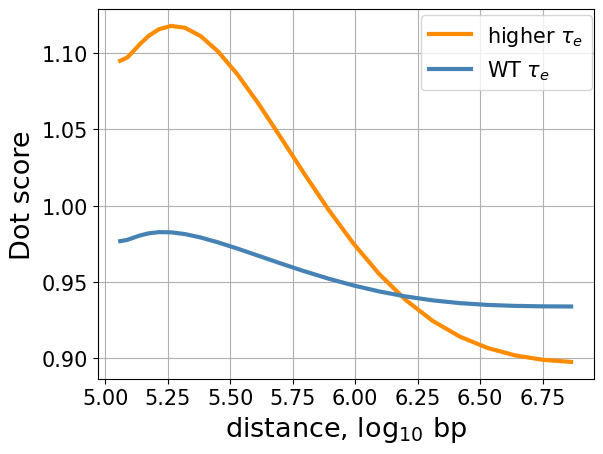

In [8]:
i = 1

for clife_val in clife_range:
    i+=1
    for name in list(path_dict.keys()):
        params=[ast.literal_eval(i) for i in name.split('folder_')[1].split('_')[1::2]]
        face, back, clife, cof, life, slife, birth, pause, sep, site, mon, rep, step, vel = params
        if np.round(clife,1)==np.round(clife_val,1):
            print(np.round(clife * TIME_CONV_COEF,1),'seconds')
            
            if life == 1500 and vel ==1 and np.round((clife/(clife+cof)),2)==0.7:
                f=pd.read_csv('../output/scores/simulation/peakscore_with_orientation/peakscore_%s_hsteps_orientation_cool_res_10_points_eq_l_pseudo_Psd1000.csv' % name)
                f = f[f['orientation']=='-+']
                chr_dist = f['chr_distance']
                peak_score = f['peak_score']
                pixel_sta = 1

                color = 'darkorange'
                plt.plot(np.log10(chr_dist[pixel_sta:]*1000), smooth(peak_score[pixel_sta:], 3.95),color= color,linewidth = 3,label=r'higher $\tau_e$')
                
            if life == 500 and vel ==1 and np.round((clife/(clife+cof)),2)==0.7:
                f=pd.read_csv('../output/scores/simulation/peakscore_with_orientation/peakscore_%s_hsteps_orientation_cool_res_10_points_eq_l_pseudo_Psd1000.csv' % name)
                f = f[f['orientation']=='-+']
                chr_dist = f['chr_distance']
                peak_score = f['peak_score']
                pixel_sta = 1
                color='steelblue'
                plt.plot(np.log10(chr_dist[pixel_sta:]*1000), smooth(peak_score[pixel_sta:], 3.95),color=color,linewidth = 3,label=r'WT $\tau_e$')

    plt.grid(True)
    plt.ylabel('Dot score',fontsize = 19.5)
    plt.xlabel(r'distance, $\log_{10}\ \mathrm{bp}$', fontsize = 19.5)
    plt.legend(loc=(0.651,0.781), fontsize = 15)
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)
    plt.savefig('../output/figures/peak_and_distance_clife_%s_dive.pdf'%clife_val,bbox_inches = 'tight',transparent=True)
    plt.show()

### convergent, magnitude

30.0 seconds


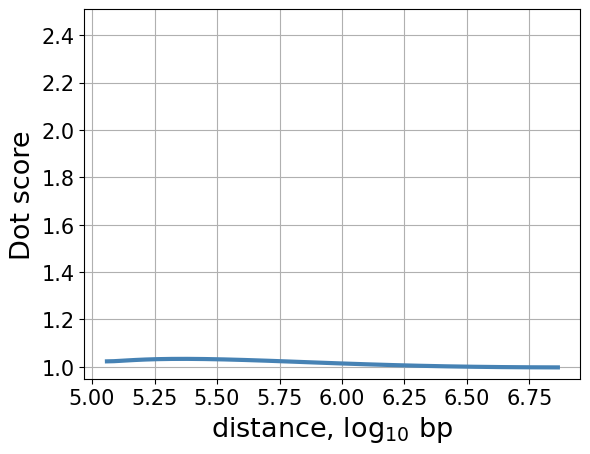

150.0 seconds
150.0 seconds


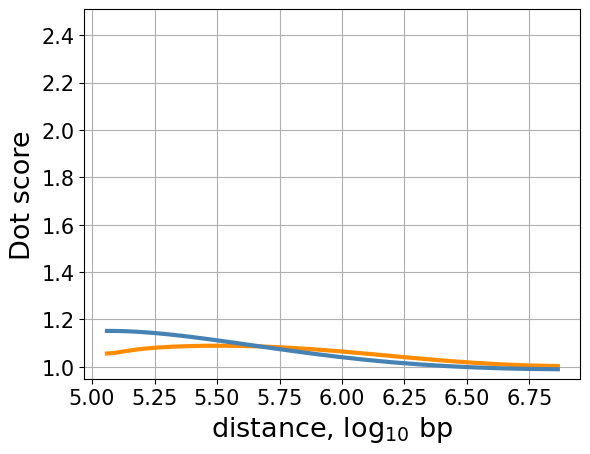

300.0 seconds
300.0 seconds
300.0 seconds


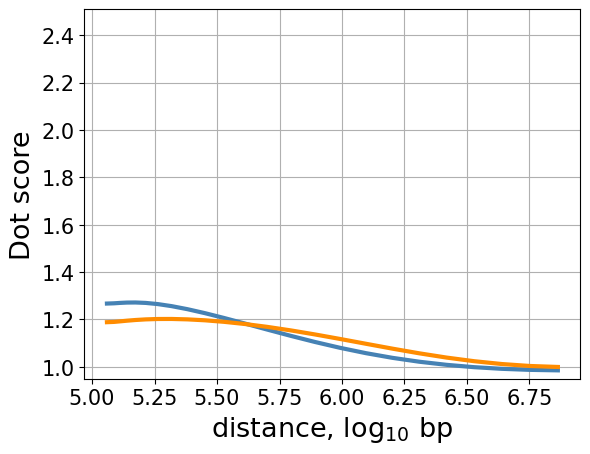

300.0 seconds
300.0 seconds
300.0 seconds


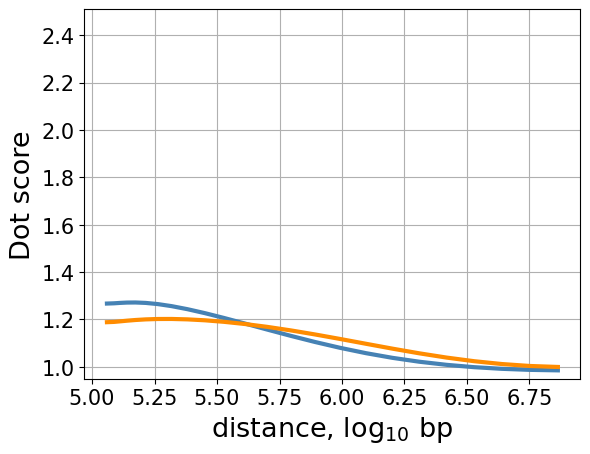

600.0 seconds
600.0 seconds


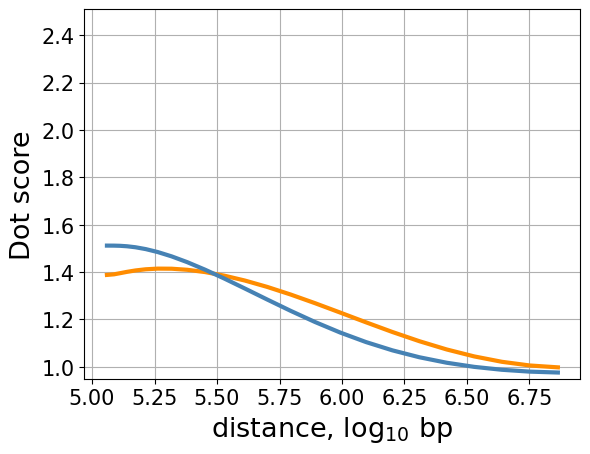

900.0 seconds
900.0 seconds
900.0 seconds


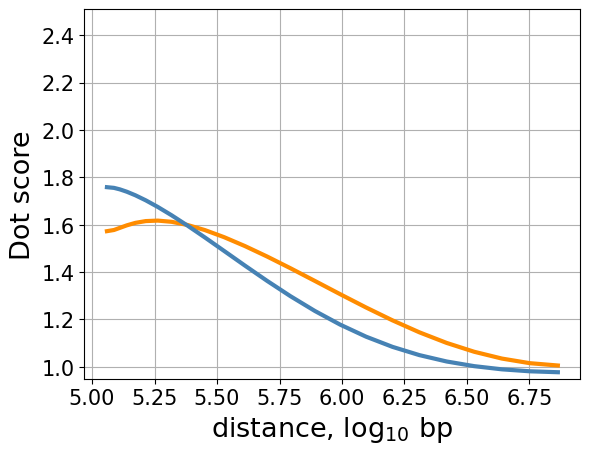

1500.0 seconds
1500.0 seconds
1500.0 seconds
1500.1 seconds


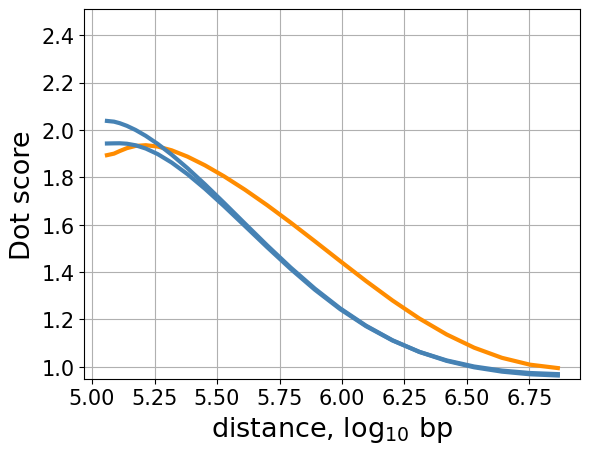

1500.0 seconds
1500.0 seconds
1500.0 seconds
1500.1 seconds


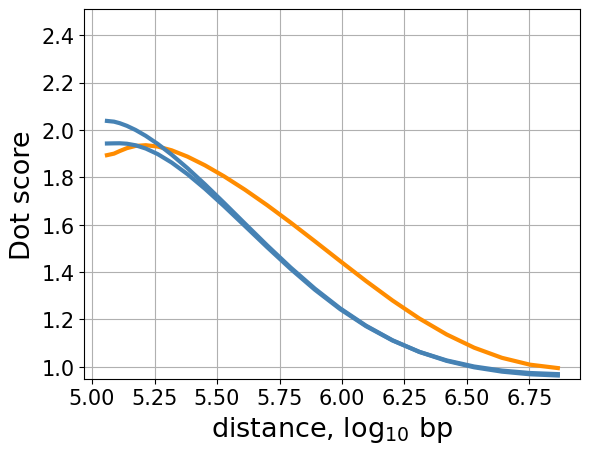

2235.0 seconds
2235.0 seconds


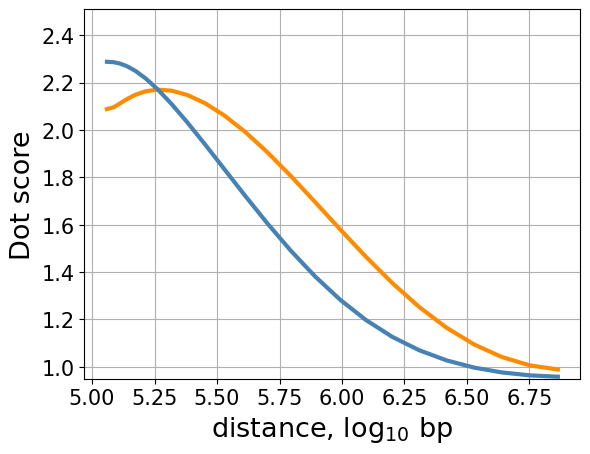

3000.0 seconds
3000.0 seconds
3000.0 seconds


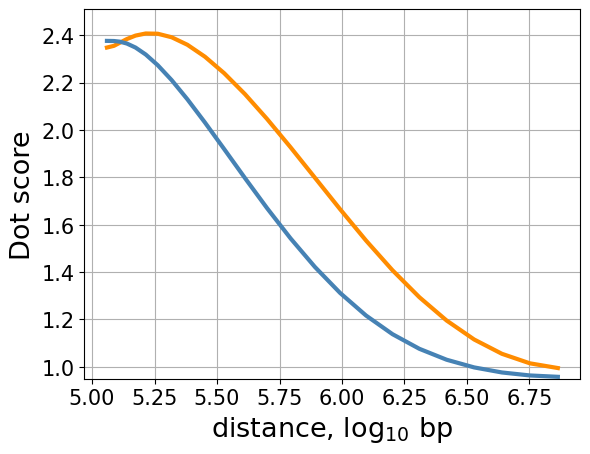

6000.0 seconds
6000.0 seconds
6000.0 seconds


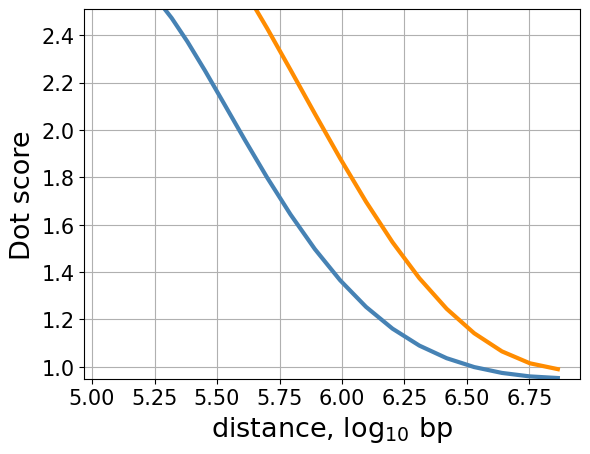

30000.0 seconds
30000.0 seconds
30000.0 seconds


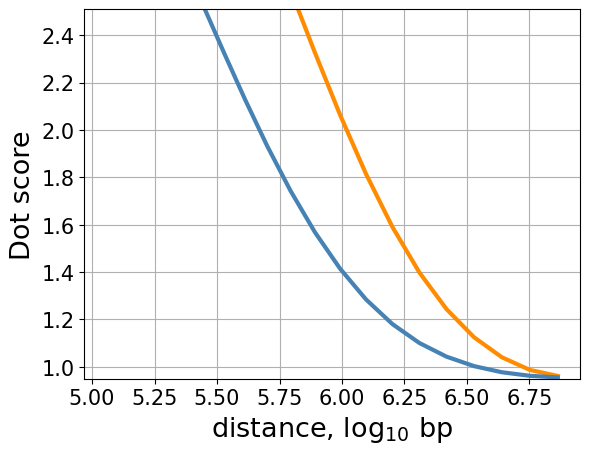

In [9]:
i = 1

for clife_val in clife_range:
    i+=1
    for name in list(path_dict.keys()):
        params=[ast.literal_eval(i) for i in name.split('folder_')[1].split('_')[1::2]]
        face, back, clife, cof, life, slife, birth, pause, sep, site, mon, rep, step, vel = params
        if np.round(clife,1)==np.round(clife_val,1):
            print(np.round(clife * TIME_CONV_COEF,1),'seconds')
            
            if life == 1500 and vel ==1 and np.round((clife/(clife+cof)),2)==0.7:
                f=pd.read_csv('../output/scores/simulation/peakscore_with_orientation/peakscore_%s_hsteps_orientation_cool_res_10_points_eq_l_pseudo_Psd1000.csv' % name)
                f = f[f['orientation']=='+-']
                chr_dist = f['chr_distance']
                peak_score = f['peak_score']
                pixel_sta = 1

                color = 'darkorange'
                plt.plot(np.log10(chr_dist[pixel_sta:]*1000), smooth(peak_score[pixel_sta:], 3.95),color= color,linewidth = 3,label=r'higher $\tau_e$')
                
            if life == 500 and vel ==1 and np.round((clife/(clife+cof)),2)==0.7:
                f=pd.read_csv('../output/scores/simulation/peakscore_with_orientation/peakscore_%s_hsteps_orientation_cool_res_10_points_eq_l_pseudo_Psd1000.csv' % name)
                f = f[f['orientation']=='+-']
                chr_dist = f['chr_distance']
                peak_score = f['peak_score']
                pixel_sta = 1
                color='steelblue'
                plt.plot(np.log10(chr_dist[pixel_sta:]*1000), smooth(peak_score[pixel_sta:], 3.95),color=color,linewidth = 3,label=r'WT $\tau_e$')

    plt.grid(True)
    plt.ylim(0.95,2.51)
    plt.ylabel('Dot score',fontsize = 19.5)
    plt.xlabel(r'distance, $\log_{10}\ \mathrm{bp}$', fontsize = 19.5)
    #plt.legend(loc=(0.651,0.781), fontsize = 15)
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)
    plt.savefig('../output/figures/peak_and_distance_clife_%s_conv_mag.pdf'%clife_val,bbox_inches = 'tight',transparent=True)
    plt.show()

### binding time vs occupancy for orientation

In [10]:
file = pd.read_csv('../output/scores/simulation/scores/peak_score_averaged_hsteps_coolres10_points_eq_orientation_conv_psd1000_t.csv')

In [11]:
file['clife']=file['clife']
file['cof']=file['cof']
lifetime = file['life']
velocity = file['velocity']
clife = file['clife']
cof = file['cof']
file['occupancy']=(file['clife']/(file['clife']+file['cof'])).round(2)
occupancy = file['occupancy']


unique_life = np.unique(lifetime)
unique_vel = np.unique(velocity)
unique_clife = np.unique(clife)
unique_cof = np.unique(cof)
unique_occup = np.unique(occupancy)

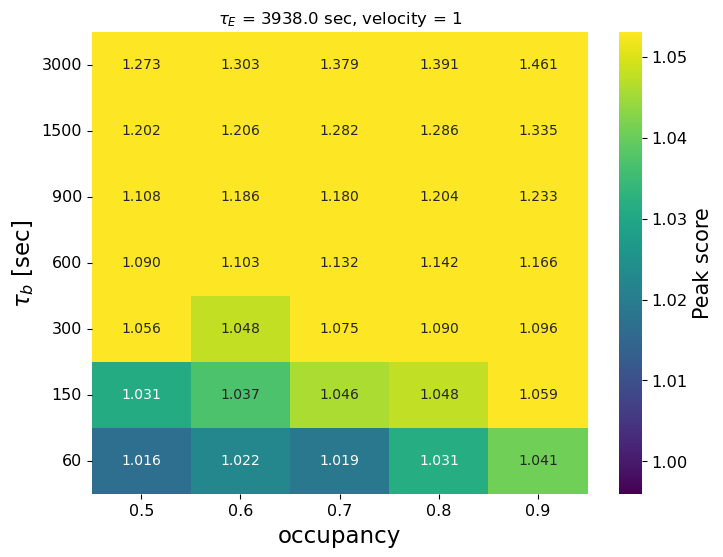

In [12]:
list_life, list_vel = [1500], [1]

numline_c = 7
numline_o = 5
occupancy_range = [0.5, 0.6, 0.7, 0.8, 0.9]


for life in list_life:
    for vel in list_vel:
        new_file_filtered_unique = file.query('life == @life and velocity == @vel and occupancy in @occupancy_range')[['clife', 'occupancy', 'peak_ave']]

        # Group by 'clife' and 'occupancy_bin', and calculate the mean of 'isoscore'
        dtaframe_grouped = new_file_filtered_unique.groupby(['clife', 'occupancy'], as_index=False).mean()
        dtaframe_grouped['clife'] = (dtaframe_grouped['clife'] * TIME_CONV_COEF).round()
        dtaframe_grouped = dtaframe_grouped.drop_duplicates(keep='first')
        dtaframe_grouped = dtaframe_grouped[dtaframe_grouped['clife'] > 30]
        dtaframe_grouped = dtaframe_grouped[dtaframe_grouped['clife'] <= 3000]
        heatmap_data = dtaframe_grouped.pivot('clife', 'occupancy', 'peak_ave')
        
        plt.figure(figsize=(8, 6))
        im = sns.heatmap(heatmap_data, annot=True, cmap='viridis', fmt=".3f", vmin=0.996, vmax=1.0531, cbar_kws={'label': 'Frip score'})
        sns.set(font_scale=0.831)
        cbar = im.collections[0].colorbar
        cbar.ax.tick_params(labelsize=11.75)
        cbar.set_label('Peak score', fontsize=15)
        

        # Format tick labels
        im.set_xticklabels([int(float(t.get_text())) if float(t.get_text()).is_integer() else t.get_text() for t in im.get_xticklabels()])
        im.set_yticklabels([int(float(t.get_text())) if float(t.get_text()).is_integer() else t.get_text() for t in im.get_yticklabels()])

        plt.xlabel('occupancy', fontsize=16.5)
        plt.xticks(fontsize=11.5, rotation=0)
        plt.ylabel(r'$\tau_b$ [sec]', fontsize=16.5)
        plt.yticks(fontsize=11.5, rotation=0)
        plt.title(r'$\tau_E$ = %s sec, velocity = %s' % (np.round(life * TIME_CONV_COEF), vel), fontsize=11.95)
        # Add legend
        plt.gca().invert_yaxis()
        plt.savefig('../output/figures/peaksweep_for_occupancy_%s_%s.pdf'%(life, vel), transparent = True, bbox_inches = 'tight')
        plt.show()


### binding time vs occupancy with orientation

In [13]:
file = pd.read_csv('../output/scores/simulation/scores/peak_score_averaged_hsteps_coolres10_points_eq_orientation_conv_psd1000_t.csv')
lifetime = file['life']
velocity = file['velocity']
clife = file['clife']
cof = file['cof']
file['occupancy']=(file['clife']/(file['clife']+file['cof'])).round(2)

### for convergent orientation

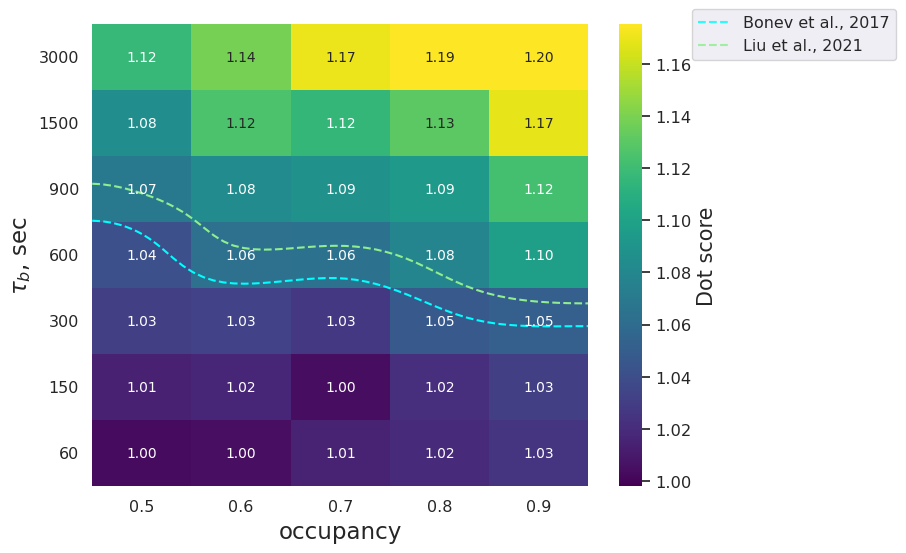

In [14]:
list_life, list_vel = [500], [1]

occupancy_range = [0.5, 0.6, 0.7, 0.8, 0.9]

from scipy.ndimage.filters import gaussian_filter
for life in list(list_life):
    for vel in list(list_vel):
        new_file_filtered_unique = file.query('life == @life and velocity == @vel and occupancy in @occupancy_range')[['clife', 'occupancy', 'peak_ave']]
        
        # Group by 'clife' and 'occupancy_bin', and calculate the mean of 'isoscore'
        dtaframe_grouped = new_file_filtered_unique.groupby(['clife', 'occupancy'], as_index=False).mean()
        convertor = 21.875 * 60 / 500
        dtaframe_grouped['clife'] = (dtaframe_grouped['clife'] * convertor).round()
        dtaframe_grouped = dtaframe_grouped.drop_duplicates(keep='first')
        dtaframe_grouped = dtaframe_grouped[dtaframe_grouped['clife'] > 30]
        dtaframe_grouped = dtaframe_grouped[dtaframe_grouped['clife'] <= 3000]
        heatmap_data = dtaframe_grouped.pivot('clife', 'occupancy', 'peak_ave')
        
        plt.figure(figsize=(8, 6))
        im = sns.heatmap(heatmap_data, annot=True, cmap='viridis', fmt=".2f", vmin=0.998, vmax=1.1751, cbar_kws={'label': 'Frip score'})
        sns.set(font_scale=0.931)
        cbar = im.collections[0].colorbar
        cbar.ax.tick_params(labelsize=11.75)
        cbar.set_label('Dot score', fontsize=15)
        
        ### adding experimental values to the map
        Bonev = utvis.make_equipotential_lines(heatmap_data,Bonev_val_wt, label = 'Bonev et al., 2017', expand_cof = 10,
                                              color='cyan', linestyles='dashed')
        Liu = utvis.make_equipotential_lines(heatmap_data,Liu_val_wt,label='Liu et al., 2021',
                                              color='lightgreen', linestyles='dashed')
        
        # Format tick labels
        im.set_xticklabels([int(float(t.get_text())) if float(t.get_text()).is_integer() else t.get_text() for t in im.get_xticklabels()])
        im.set_yticklabels([int(float(t.get_text())) if float(t.get_text()).is_integer() else t.get_text() for t in im.get_yticklabels()])

        plt.xlabel('occupancy', fontsize=16.5)
        plt.xticks(fontsize=11.5, rotation=0)
        plt.ylabel(r'$\tau_b$, sec', fontsize=16.5)
        plt.yticks(fontsize=11.5, rotation=0)
        # Add legend
        plt.legend(handles=[Bonev, Liu], loc='upper center', bbox_to_anchor=(1.415, 1.05), fontsize=11.5, ncol = 1)
        plt.gca().invert_yaxis()
        plt.savefig('../output/figures/peaksweep_for_occupancy_%s_%s_conv.pdf'%(life, vel), transparent = True, bbox_inches = 'tight')
        plt.show()


### tau vs tau'

In [15]:
file = pd.read_csv('../output/scores/simulation/scores/peak_score_averaged_hsteps_coolres10_conv_psd1000_t.csv')

In [16]:
lifetime = file['life']
velocity = file['velocity']
clife = file['clife']
cof = file['cof']
file['peak_ave']=np.round(file['peak_ave'],3)

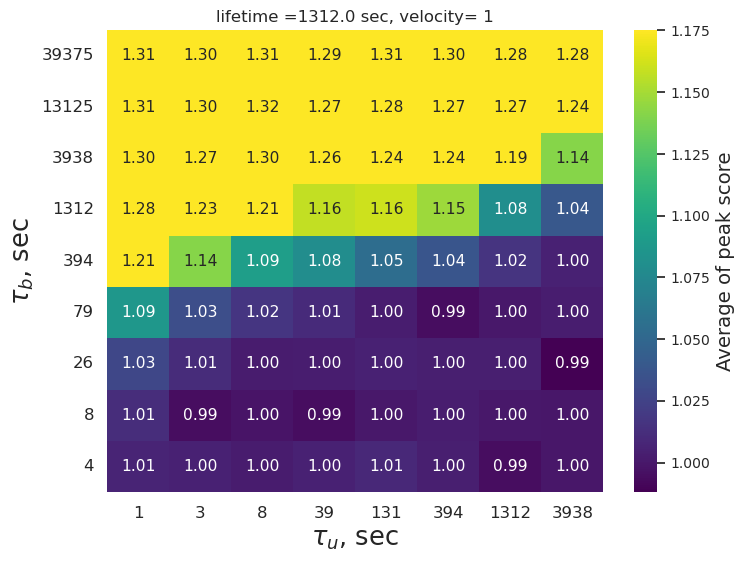

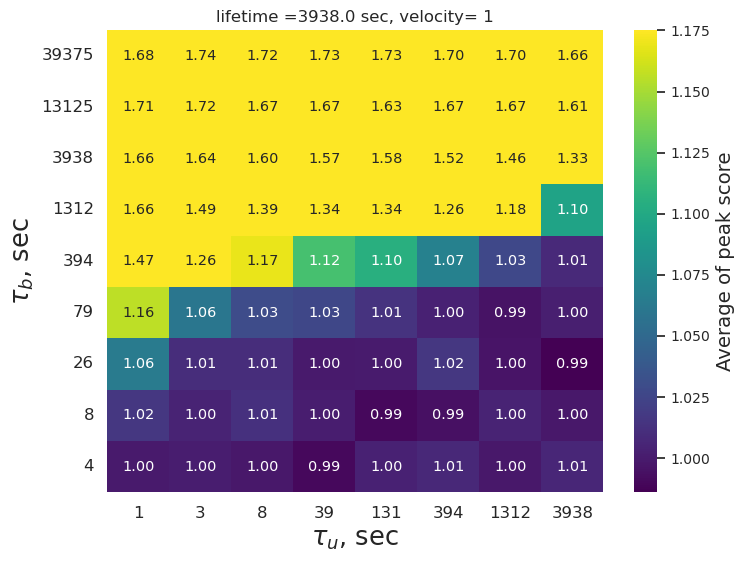

In [17]:
unique_life, unique_vel = [500, 1500],[1]

for life in list(unique_life):
    for vel in list(unique_vel):
        new_file = file.query('life == @life and velocity == @vel')[['clife','cof','peak_ave']]
        new_file = new_file[new_file['cof']>0.15]
        new_file['clife']= np.round(TIME_CONV_COEF* new_file['clife'])
        new_file['cof']= np.round(TIME_CONV_COEF*new_file['cof'])
        heatmap_data = new_file.pivot('clife', 'cof', 'peak_ave')
        
        # Create the heatmap using seaborn
        plt.figure(figsize=(8, 6))
        im = sns.heatmap(heatmap_data, annot=True, cmap='viridis', vmax = 1.1751,fmt='.2f',cbar_kws={'label': 'Average of peak score'} )
        sns.set(font_scale=0.871)
        # Customize labels and title
        cbar = im.collections[0].colorbar
        cbar.ax.tick_params(labelsize=10)
        cbar.set_label('Average of peak score', fontsize=14.15) 

        im.set_xticklabels(['{:.1f}'.format(float(t.get_text())) for t in im.get_xticklabels()])
        plt.xlabel(r'$\tau_u$, sec', fontsize = 18.5)
        plt.ylabel(r'$\tau_b$, sec', fontsize =18.5)
        plt.title('lifetime =%s sec, velocity= %s'%(np.round(life*TIME_CONV_COEF), vel),fontsize = 11.95)
        im.set_xticklabels([int(float(t.get_text())) if float(t.get_text()).is_integer() else t.get_text() for t in im.get_xticklabels()])
        im.set_yticklabels([int(float(t.get_text())) if float(t.get_text()).is_integer() else t.get_text() for t in im.get_yticklabels()])
        plt.xticks(fontsize=11.95)
        plt.yticks(fontsize=11.95)
        plt.gca().invert_yaxis()
        plt.savefig('../output/figures/sweep_peak_ave_for_%s_%s_coolres10.pdf'%(life, vel), transparent = True, bbox_inches = 'tight')
        plt.show()



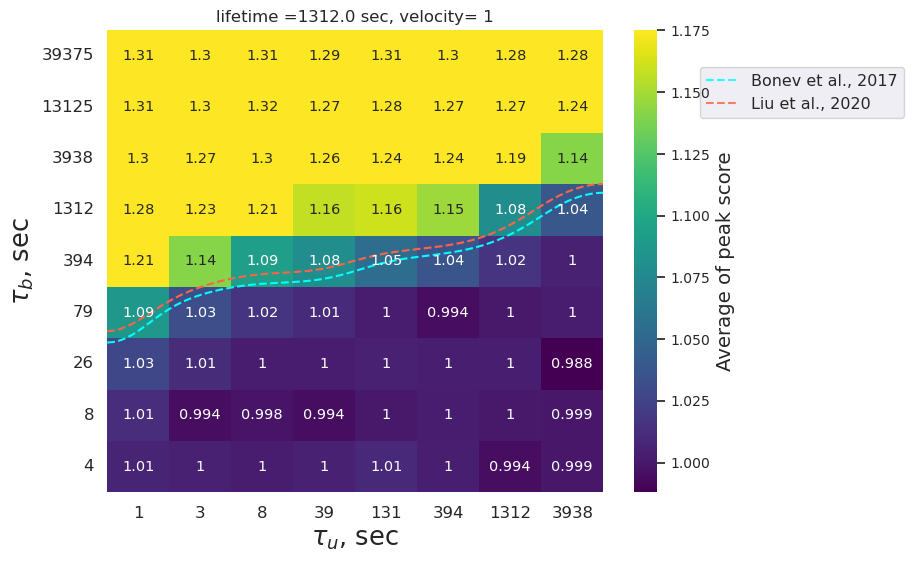

In [18]:
unique_life, unique_vel = [500],[1]

for life in list(unique_life):
    for vel in list(unique_vel):
        new_file = file.query('life == @life and velocity == @vel')[['clife','cof','peak_ave']]
        new_file = new_file[new_file['cof']>0.15]
        new_file['clife']= np.round(TIME_CONV_COEF* new_file['clife'])
        new_file['cof']= np.round(TIME_CONV_COEF*new_file['cof'])
        heatmap_data = new_file.pivot('clife', 'cof', 'peak_ave')
        
        # Create the heatmap using seaborn
        plt.figure(figsize=(8, 6))
        im = sns.heatmap(heatmap_data, annot=True, cmap='viridis', vmax = 1.1751,fmt='.3g',cbar_kws={'label': 'Average of peak score'} )
        sns.set(font_scale=0.871)
        # Customize labels and title
        cbar = im.collections[0].colorbar
        cbar.ax.tick_params(labelsize=10)
        cbar.set_label('Average of peak score', fontsize=14.15) 


        Bonev = utvis.make_equipotential_lines(heatmap_data,Bonev_val_wt, label = 'Bonev et al., 2017',
                                             color='cyan', linestyles='dashed')
        Liu = utvis.make_equipotential_lines(heatmap_data,Liu_val_wt,label='Liu et al., 2020',
                                             color='tomato', linestyles='dashed')
        
        im.set_xticklabels(['{:.1f}'.format(float(t.get_text())) for t in im.get_xticklabels()])
        plt.xlabel(r'$\tau_u$, sec', fontsize = 18.5)
        plt.ylabel(r'$\tau_b$, sec', fontsize =18.5)
        plt.title('lifetime =%s sec, velocity= %s'%(np.round(life*TIME_CONV_COEF), vel),fontsize = 11.95)
        im.set_xticklabels([int(float(t.get_text())) if float(t.get_text()).is_integer() else t.get_text() for t in im.get_xticklabels()])
        im.set_yticklabels([int(float(t.get_text())) if float(t.get_text()).is_integer() else t.get_text() for t in im.get_yticklabels()])
        plt.xticks(fontsize=11.95)
        plt.yticks(fontsize=11.95)
        plt.gca().invert_yaxis()
        plt.legend(handles=[Bonev, Liu], loc=(1.195,0.81), fontsize =11.5)
        plt.savefig('../output/figures/peak_ave_for_%s_%s_coolres10.pdf'%(life, vel), transparent = True, bbox_inches = 'tight')
        plt.show()



### peak score WT vs Wapl convergent

In [31]:
file = pd.read_csv('../output/scores/simulation/scores/peak_score_averaged_hsteps_coolres10_points_eq_orientation_conv_psd1000_t.csv')
file
lifetime = file['life']
velocity = file['velocity']
clife = file['clife']
cof = file['cof']
file['occupancy']=(file['clife']/(file['clife']+file['cof'])).round(2)
unique_life = np.unique(lifetime)
unique_vel = np.unique(velocity)
unique_clife = np.unique(clife)
unique_cof = np.unique(cof)
unique_occupancy = np.unique(file['occupancy'])

In [32]:
peak_wt, peak_wapl  = file[file['life']==500], file[file['life']==1500]

In [33]:
common_columns = [ 'velocity', 'clife', 'cof', 'occupancy']

# Merge the datasets on the common columns
peak_wt_70 = peak_wt[peak_wt['occupancy']==0.70]
peak_wapl_70 = peak_wapl[peak_wapl['occupancy']==0.70]
merged_df = pd.merge(peak_wt_70, peak_wapl_70, on=common_columns, how='inner')
merged_df ['clife'] = (merged_df['clife']*TIME_CONV_COEF).round()

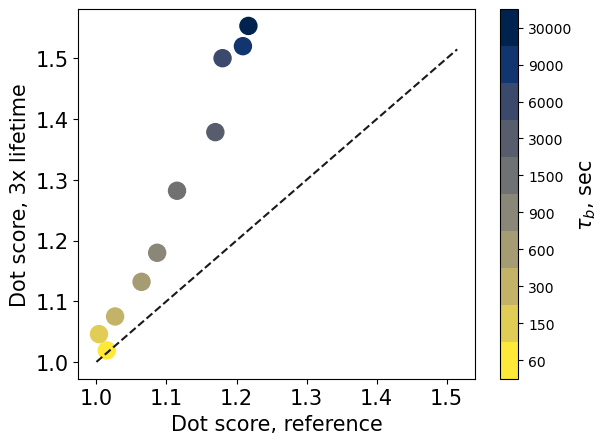

In [38]:
# Reset Seaborn's default parameters
sns.reset_defaults()

# Sort the DataFrame based on 'clife'
merged_df = merged_df.sort_values(by=['clife'])

# Number of unique points (colors) you want
import matplotlib.colors as mcolors
num_colors = len(merged_df['clife'].unique())
cmap = plt.cm.get_cmap('cividis_r', num_colors)
norm = mcolors.BoundaryNorm(boundaries=np.arange(-0.5, num_colors), ncolors=num_colors)

clife_indices = merged_df['clife'].rank(method='dense').astype(int) - 1

# Create a scatter plot using discrete colors
sc = plt.scatter(
    merged_df['peak_ave_x'], 
    merged_df['peak_ave_y'],
    s=150, 
    c=clife_indices,  # Use mapped indices for coloring
    cmap=cmap,
    norm=norm  # Use the defined norm for correct color mapping
)

# Add a plot line
plt.plot([1, 1.515], [1, 1.515], '--k')

# Set labels
plt.xlabel('Dot score, reference', fontsize=15)
plt.ylabel('Dot score, 3x lifetime', fontsize=15)

# Add a color bar and set its label
cbar = plt.colorbar(sc, ticks=np.arange(num_colors))
cbar.set_label(r'$\tau_b$, sec', fontsize=15)
cbar.ax.set_yticklabels([f'{clife:.2f}' for clife in sorted(merged_df['clife'].unique())])
# Set integer labels for the color bar
cbar.ax.set_yticklabels([f'{int(clife)}' for clife in sorted(merged_df['clife'].unique())])

# Set font size for ticks
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.savefig('../output/figures/peakwt_vs_peakwapl_conv.pdf', transparent=True, dpi=500)
plt.show()


In [39]:
clife_list = [60.0, 900.0, 1500.0, 3000]

merged_df_sort = merged_df[merged_df['clife'].isin(clife_list)]
merged_df_sort = merged_df_sort.sort_values('clife')

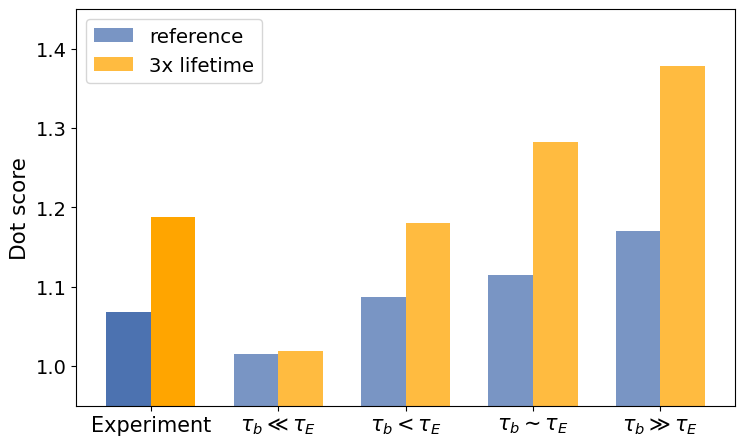

In [42]:
# Define tau_e for comparison
tau_e = 500
# Add a new column for labels based on conditions
tau_e = tau_e*convertor
def get_label(clife, tau_e):
    if clife < 0.15 * tau_e:
        return r'$\tau_b \ll \tau_E$'
    elif 0.15 * tau_e < clife and clife < 0.75*tau_e:
        return r'$\tau_b < \tau_E$'
    elif clife > 1.5 * tau_e:
        return r'$\tau_b \gg \tau_E$'
    else:
        return r'$\tau_b \sim \tau_E$'
sns.reset_defaults()
merged_df_sort['label'] = merged_df_sort['clife'].apply(lambda x: get_label(x, tau_e))

# Plotting
fig, ax = plt.subplots(figsize=(8.5, 5.15))

# Define the bar width
bar_width = 0.35

# Plot bars for experimental data at the beginning
exp_index = 0  # Positioning them at the beginning of the plot
bars3 = ax.bar(exp_index, Liu_val_wt, bar_width,  color='b')#WT, Liu et al, 2020 label =r'WT, Liu et al, 2021',
bars4 = ax.bar(exp_index + bar_width, Liu_val_wapl, bar_width, color='orange')# label=r'Wapl 6h, Liu et al, 2021'

# Create positions for bars and plot for merged_df_sort
index = np.arange(1, len(merged_df_sort) + 1)  # Start from 1 for the subsequent data
bars1 = ax.bar(index, merged_df_sort['peak_ave_x'], bar_width, label= 'reference', color='b', alpha = 0.75) #alternative label r'$\tau_E$ =%s sec'%(500*convertor)
bars2 = ax.bar(index + bar_width, merged_df_sort['peak_ave_y'], bar_width, label= '3x lifetime', color='orange', alpha = 0.75) #alternative label r'$\tau_E = %s sec$'%(1500*convertor)

# Set labels and title
ax.set_ylabel('Dot score', fontsize=15.5)

# Adjust x-ticks to align with the bars
ax.set_xticks(np.append(exp_index + bar_width / 2, index + bar_width / 2))
ax.set_xticklabels(['Experiment'] + list(merged_df_sort['label']), fontsize = 15)
ax.set_ylim(0.95, 1.45)
ax.tick_params(axis='y', labelsize=14) 
ax.legend(fontsize = 14.15)
plt.savefig('../output/figures/bar_for_peak_conv.pdf', transparent = True)
plt.show()
